In [1]:
import pandas as pd
rain=pd.read_csv('chennai_reservoir_rainfall.csv')
res=pd.read_csv('chennai_reservoir_levels.csv')

In [2]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [3]:
rain.dtypes

Date                object
POONDI             float64
CHOLAVARAM         float64
REDHILLS           float64
CHEMBARAMBAKKAM    float64
dtype: object

In [4]:
res.dtypes

Date                object
POONDI             float64
CHOLAVARAM         float64
REDHILLS           float64
CHEMBARAMBAKKAM    float64
dtype: object

In [5]:
res.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [6]:
#df=rain.join(res,lsuffix="_Rain",rsuffix="_Res")

In [7]:
df=rain.merge(res,on='Date',how='inner',suffixes=("_Rain","_Res"))

In [8]:
df.head()

,Date,POONDI_Rain,CHOLAVARAM_Rain,REDHILLS_Rain,CHEMBARAMBAKKAM_Rain,POONDI_Res,CHOLAVARAM_Res,REDHILLS_Res,CHEMBARAMBAKKAM_Res
0,01-01-2004,0.0,0.0,0.0,0.0,3.9,0.0,268.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0,3.9,0.0,268.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0,3.9,0.0,267.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0,3.9,0.0,267.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0,3.8,0.0,267.0,0.0


In [9]:
# updating rain data
# convert date to datetime object
rain.Date=pd.to_datetime(rain.Date,format="%d-%m-%Y")
#update the index with datetime
rain.index=rain.Date
#drop the Date column as it is unnecessary
rain=rain.drop(['Date'],axis=1)

In [10]:
rain.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,0.0,0.0,0.0,0.0
2004-01-02,0.0,0.0,0.0,0.0
2004-01-03,0.0,0.0,0.0,0.0
2004-01-04,0.0,0.0,0.0,0.0
2004-01-05,0.0,0.0,0.0,0.0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\48585\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rainfail in CM')

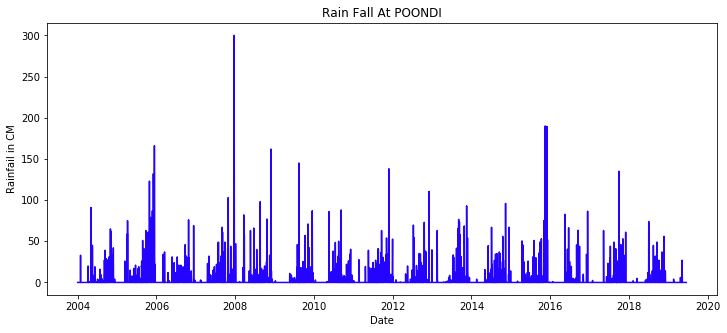

In [12]:
plt.figure(figsize=(12,5))
plt.plot(rain.POONDI,color='#2403ff')
plt.title("Rain Fall At POONDI")
plt.xlabel("Date")
plt.ylabel("Rainfail in CM")

Text(0, 0.5, 'Rainfail in CM')

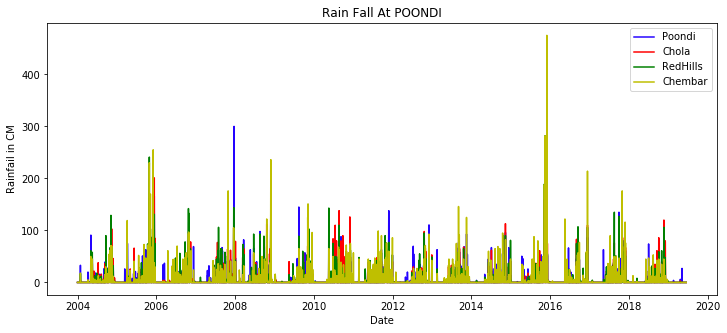

In [13]:
plt.figure(figsize=(12,5))
plt.plot(rain.POONDI,color='#2403ff',label="Poondi")
plt.plot(rain.CHOLAVARAM,color='r',label="Chola")
plt.plot(rain.REDHILLS,color='g',label="RedHills")
plt.plot(rain.CHEMBARAMBAKKAM,color='y',label="Chembar")
plt.legend()
plt.title("Rain Fall At POONDI")
plt.xlabel("Date")
plt.ylabel("Rainfail in CM")

In [14]:
rain['Total']=(rain.POONDI+rain.CHOLAVARAM+rain.REDHILLS+rain.CHEMBARAMBAKKAM)/4

In [15]:
rain.head(1)

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total
Date,,,,,
2004-01-01,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Rainfail in CM')

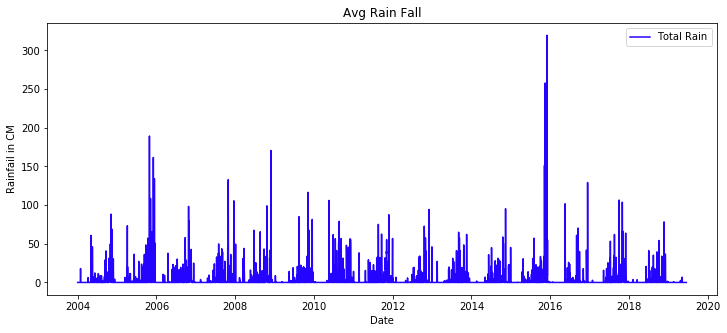

In [16]:
plt.figure(figsize=(12,5))
plt.plot(rain.Total,color='#2403ff',label="Total Rain")
plt.legend()
plt.title("Avg Rain Fall")
plt.xlabel("Date")
plt.ylabel("Rainfail in CM")

In [17]:
rain["Date"]=rain.index

In [18]:
rain.Date[0].month

1

In [19]:
rain['year']=rain.Date.map(lambda x: x.year)
rain['month']=rain.Date.map(lambda x: x.month)

In [20]:
rain.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total,Date,year,month
Date,,,,,,,,
2004-01-01,0.0,0.0,0.0,0.0,0.0,2004-01-01,2004,1
2004-01-02,0.0,0.0,0.0,0.0,0.0,2004-01-02,2004,1
2004-01-03,0.0,0.0,0.0,0.0,0.0,2004-01-03,2004,1
2004-01-04,0.0,0.0,0.0,0.0,0.0,2004-01-04,2004,1
2004-01-05,0.0,0.0,0.0,0.0,0.0,2004-01-05,2004,1


In [21]:
yearly_rainfall_total=rain.groupby(['year'])["Total"].sum()

Text(0.5, 1.0, 'Yearly Total Rain')

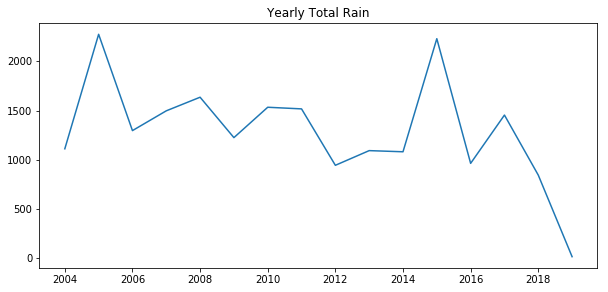

In [22]:
plt.figure(figsize=(10,4.5))
plt.plot(yearly_rainfall_total)
plt.title("Yearly Total Rain")

Text(0.5, 1.0, 'Rainfall Per year')

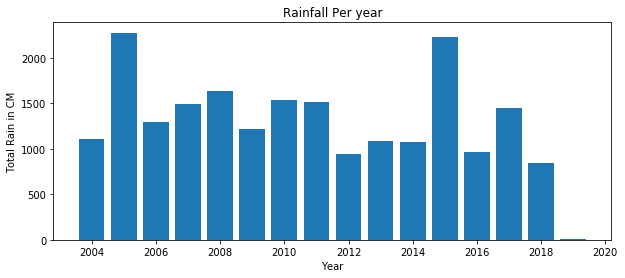

In [23]:
plt.figure(figsize=(10,4))
plt.bar(yearly_rainfall_total.index,yearly_rainfall_total)
plt.xlabel('Year')
plt.ylabel("Total Rain in CM")
plt.title("Rainfall Per year")

In [24]:
calan={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",  7:"July",
      8:"Aug",   9:"Sep",10:"Oct", 11:"Nov", 12: "Dec"}
rain["month"]=rain.month.map(lambda x: calan[x])


In [25]:
monthy_avg_rain=rain.groupby(["month"])["Total"].mean()

Text(0.5, 1.0, 'Monthly average rainfall')

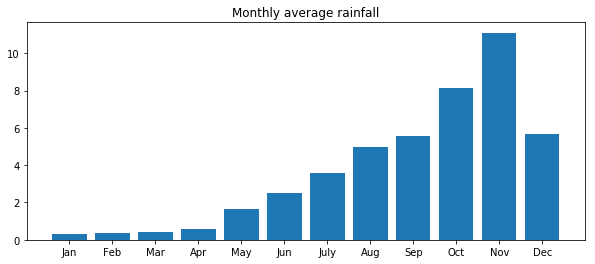

In [26]:
plt.figure(figsize=(10,4))
plt.bar(calan.values(),monthy_avg_rain.loc[calan.values()])
plt.title("Monthly average rainfall")

In [27]:
res.Date=pd.to_datetime(res.Date)
res.index=res.Date

In [28]:
res["month"]=res.Date.map(lambda x: x.month)
res["year"]=res.Date.map(lambda x: x.year)

In [29]:
res["total"]=(res['POONDI']+res['CHOLAVARAM']\
            +res['REDHILLS']+res['CHEMBARAMBAKKAM'])/4

In [30]:
avg_water=res.groupby(["year"])['total'].mean()

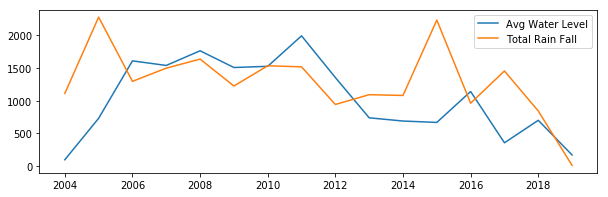

In [31]:
plt.figure(figsize=(10,3))
plt.plot(avg_water,label="Avg Water Level")
plt.plot(yearly_rainfall_total,label="Total Rain Fall")
plt.legend()

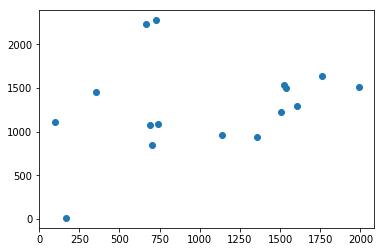

In [32]:
plt.scatter(avg_water,yearly_rainfall_total)

Text(0, 0.5, 'yearly rain fall with 1 year lag')

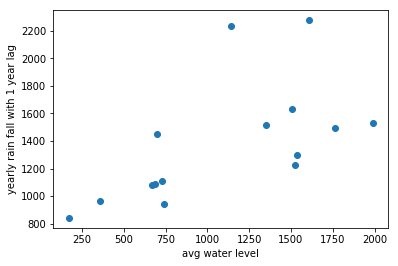

In [41]:
plt.scatter(avg_water,yearly_rainfall_total.shift(1))
plt.xlabel('avg water level')
plt.ylabel("yearly rain fall with 1 year lag")

In [37]:
from scipy.stats import pearsonr,spearmanr
print("pearson test",pearsonr(avg_water.iloc[1:],yearly_rainfall_total.shift(1).iloc[1:]))
print("Spearman test",spearmanr(avg_water.iloc[1:],yearly_rainfall_total.shift(1).iloc[1:]))

pearson test (0.607661945945549, 0.01626483853009677)
Spearman test SpearmanrResult(correlation=0.7249999999999999, pvalue=0.0022270323137542148)


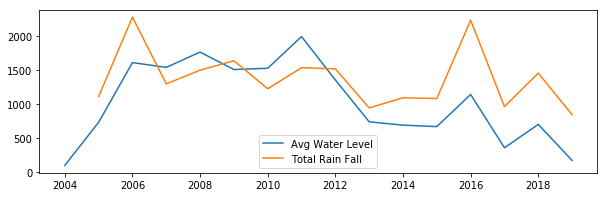

In [39]:
plt.figure(figsize=(10,3))
plt.plot(avg_water,label="Avg Water Level")
plt.plot(yearly_rainfall_total.shift(1),label="Total Rain Fall")
plt.legend()

In [46]:
d=pd.DataFrame(data={"Rainfall":yearly_rainfall_total,\
                      "Avg_Water":avg_water})
d.to_csv("chennai_water.csv")

Text(0, 0.5, 'Year')

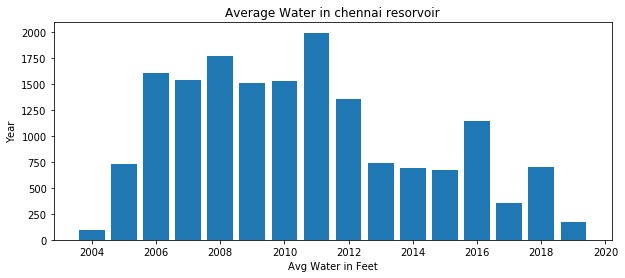

In [40]:
plt.figure(figsize=(10,4))
plt.bar(avg_water.index,avg_water)
plt.title("Average Water in chennai resorvoir")
plt.xlabel("Avg Water in Feet")
plt.ylabel("Year")

(array([4.708e+03, 2.420e+02, 1.480e+02, 9.400e+01, 6.800e+01, 5.900e+01,
        5.300e+01, 3.600e+01, 3.200e+01, 2.500e+01, 2.800e+01, 1.700e+01,
        2.000e+01, 1.000e+01, 1.100e+01, 1.800e+01, 4.000e+00, 1.100e+01,
        5.000e+00, 1.000e+01, 4.000e+00, 5.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

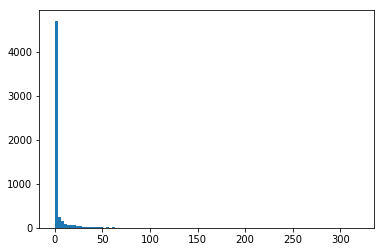

In [36]:
plt.hist(rain.Total,bins=100)

In [ ]:
plt.hist(yearly_rainfall_total[:-1],bins=4)

In [ ]:
yearly_rainfall_total[:-1].describe()